# Prediction using Supervised ML

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables. 

**Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. <br><br>
`y = mX + c`<br>
where, y is the predicted value (target), X is the feature, m is slope, c is y intercept

## Data Preparation
### Import Required library for data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Dataset

In [3]:
df = pd.read_csv('student_scores - student_scores.csv')

#### First 5 values in dataset

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Shape of dataset

In [91]:
print("Total data-points: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Total data-points:  25
Number of columns:  2


### Visualizing Dataset

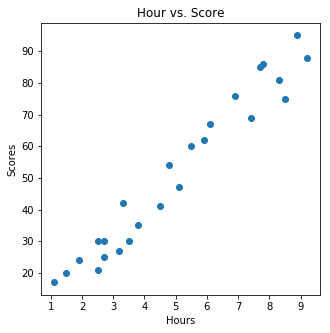

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(df.Hours, df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hour vs. Score")
plt.show()

## Traing Model
### Import requied `sklearn` libraries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Split the dataset to features and target variables

In [73]:
X = df[["Hours"]]
y = df[["Scores"]]

### Split dataset to train-test
Here we take `20%` of total dataset for testing

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

### Initialize Model

In [76]:
model = LinearRegression(normalize=False)

#### Fit dataset

In [77]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
print("So our formula for prediction is y = {}X + {}".format(model.coef_[0][0], model.intercept_[0]))

So our formula for prediction is y = 10.132025510013797X + 0.01808824077873794


## Evaluate Accuracy of model
Using the `20%` data we evaluate the accuracy of model

In [101]:
print("Model Score:", model.score(X_test, y_test))
y_test_pred = model.predict(y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred)) 

Model Score: 0.9693352483450266
Mean Absolute Error: 438.355312721441


## Visualize Prediction

In [102]:
pred = model.predict(df[["Hours"]])

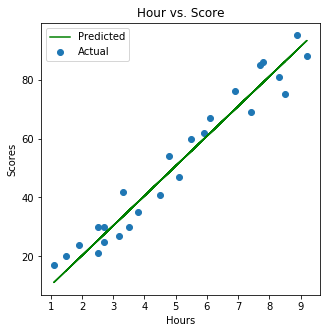

In [103]:
plt.figure(figsize=(5, 5))
plt.scatter(df.Hours, df.Scores, label="Actual")
plt.plot(df.Hours, pred, color="green", label="Predicted")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.title("Hour vs. Score")
plt.show()

## Predicting Score 

In [90]:
x = 9.25
prd = model.predict(np.array(x).reshape(-1, 1))
print("If student studies for", x, "hrs/day, then predicted score is", prd[0][0])

If student studies for 9.25 hrs/day, then predicted score is 93.73932420840636
